In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline
import xgboost as xgb

## Data Preprocessing

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# check null values 

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# check duplicate values

df.duplicated().sum()

0

In [6]:
df.shape

(6362620, 11)

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# check all data types

df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<AxesSubplot: xlabel='isFraud', ylabel='isFlaggedFraud'>

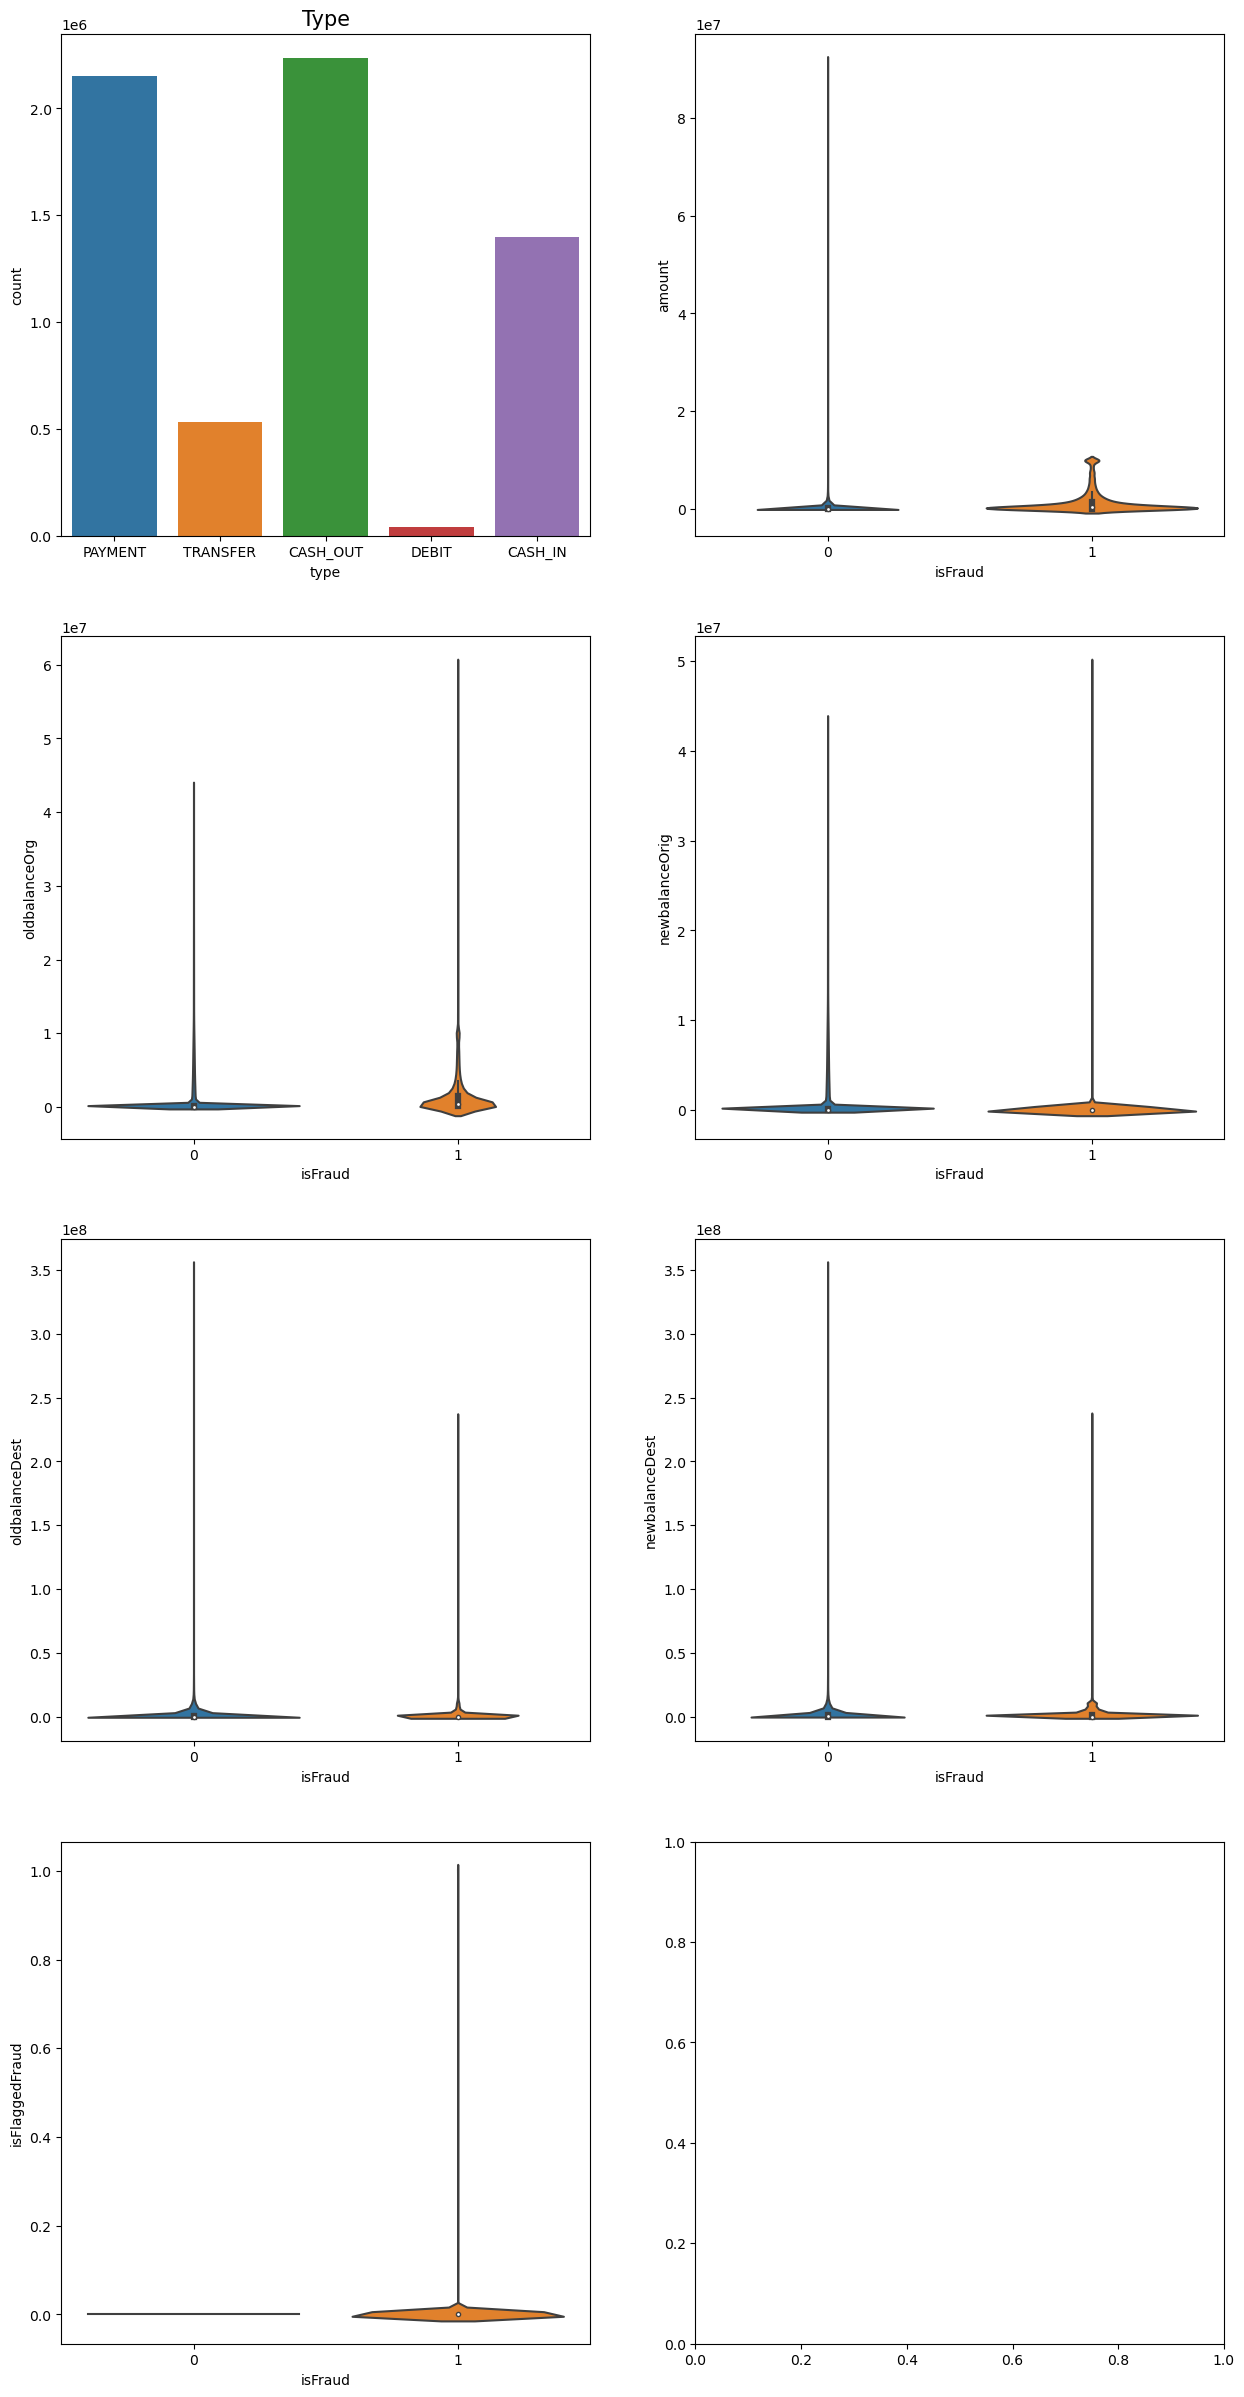

In [9]:
# lets visualize other variables with target variable and find outliers

fig,ax=plt.subplots(4,2,figsize=(15,30))
sns.countplot(x=df.type,ax=ax[0][0]).set_title('Type',size=15)
sns.violinplot(x=df.isFraud,y=df['amount'],ax=ax[0][1])
sns.violinplot(x=df.isFraud,y=df['oldbalanceOrg'],ax=ax[1][0])
sns.violinplot(x=df.isFraud,y=df['newbalanceOrig'],ax=ax[1][1])
sns.violinplot(x=df.isFraud,y=df['oldbalanceDest'],ax=ax[2][0])
sns.violinplot(x=df.isFraud,y=df['newbalanceDest'],ax=ax[2][1])
sns.violinplot(x=df.isFraud,y=df['isFlaggedFraud'],ax=ax[3][0])

<AxesSubplot: ylabel='amount'>

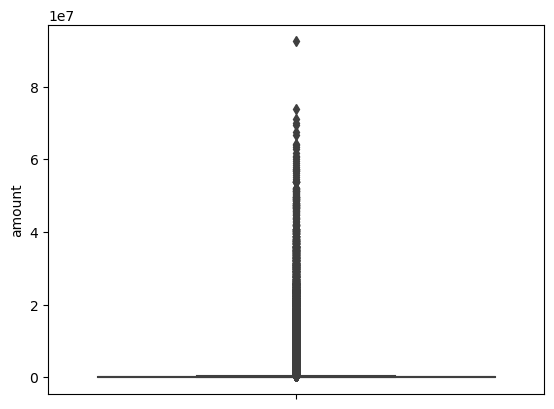

In [12]:
sns.boxplot(y=df.amount)

#### Here we can see that some outliers are present in amount

In [6]:
# lets set the limit of amount

lower_limit = df["amount"].mean() - (3 * df["amount"].std())
upper_limit = df["amount"].mean() + (3 * df["amount"].std())

print(f"Lower limit = {lower_limit}")
print(f"Upper limit = {upper_limit}")

Lower limit = -1631712.7908398563
Upper limit = 1991436.597938102


## Capping Outliers

<AxesSubplot: ylabel='amount'>

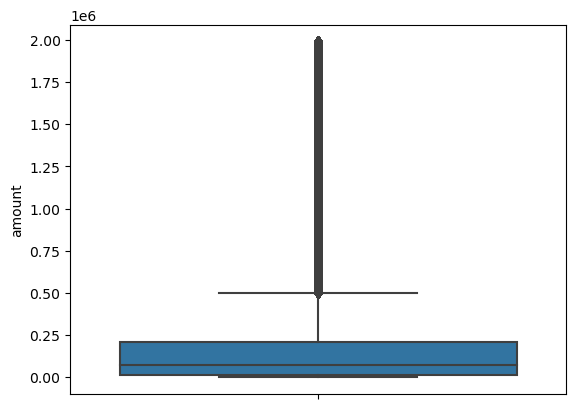

In [7]:
df["amount"] = np.where(df["amount"] > upper_limit, upper_limit,
                        np.where(df["amount"] < lower_limit, lower_limit,
                        df["amount"]))

sns.boxplot( y="amount", data=df)

In [8]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
fraud = df[df['isFraud'] == 1]

In [10]:
df['nameOrig'].nunique(), df['nameDest'].nunique()

(6353307, 2722362)

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_900\2318427200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'])


<AxesSubplot: xlabel='step', ylabel='Density'>

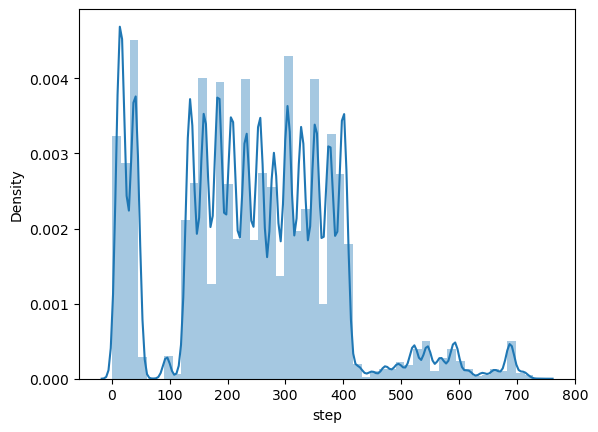

In [11]:
sns.distplot(df['step'])

([<matplotlib.patches.Wedge at 0x1c2062a1040>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87%'),
  Text(0.599995066874818, -0.002433048680711153, '0.13%')])

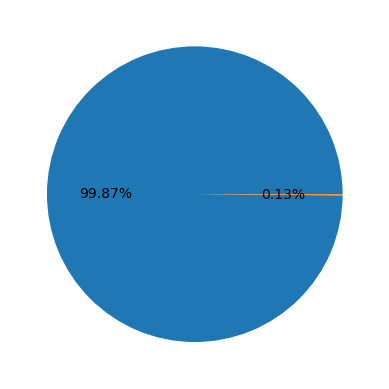

In [12]:
plt.pie(df['isFraud'].value_counts(),  autopct='%.2f%%')

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_900\1086040597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])


<AxesSubplot: xlabel='amount', ylabel='Density'>

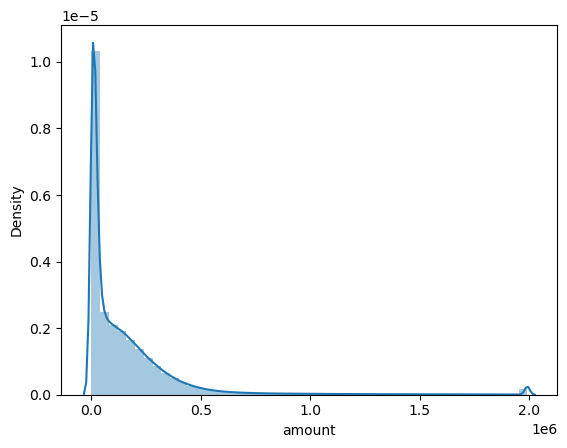

In [13]:
sns.distplot(df['amount'])

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_900\1672786388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['amount']);


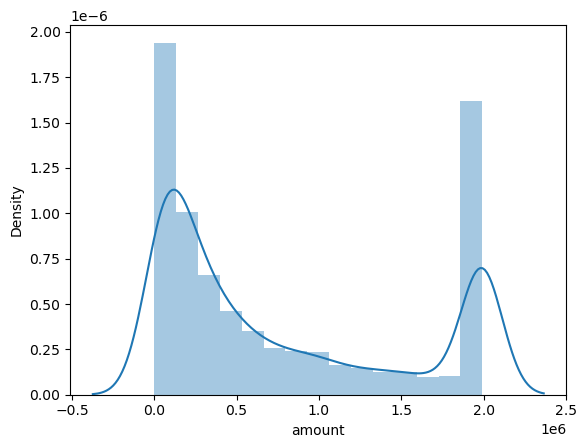

In [14]:
sns.distplot(fraud['amount']);

#### We can see that fraud is only when amount is low

In [15]:
# To see actual values

pd.set_option('display.float_format', '{:.2f}'.format) 
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,159980.72,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,263723.00,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,1991436.60,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [16]:
#checking only for categorical features

df.describe(include='object') 

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


<AxesSubplot: >

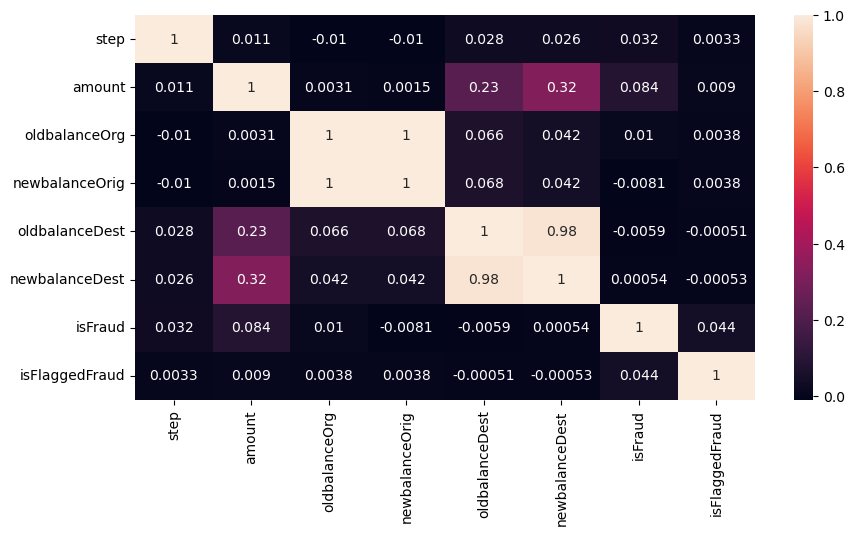

In [17]:
#check for correlation

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

So multicollinearity exists between oldbalanceOrg and newbalanceOrg; oldbalanceDest and newbalanceDest. Let us try to build the model without removing features.

## Feature engineering

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0


In [20]:
# Seperate target variable 

x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [21]:
#class 1 is minority class

y.value_counts() 

0    6354407
1       8213
Name: isFraud, dtype: int64

In [22]:
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)

In [23]:
#resampled

y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

## Scaling values

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

## Train test split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

## Model training : Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\Nagendra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = log_reg.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[1792835,  113140],
       [ 161481, 1745189]], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred)

0.9279710017586217

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93   1905975
           1       0.94      0.92      0.93   1906670

    accuracy                           0.93   3812645
   macro avg       0.93      0.93      0.93   3812645
weighted avg       0.93      0.93      0.93   3812645



 Trying to improve accuracy by removing multi-collinearity and selecting the best features

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cvs = cross_val_score(log_reg,x,y,cv=3)
print(cvs)

C:\Users\Nagendra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nagendra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[0.93538352 0.93217148 0.80681359]


In [34]:
cvs.mean()

0.8914561937937465

## Improving accuracy
Select the best 8 features

In [35]:
from sklearn.feature_selection import chi2, SelectKBest

In [36]:
best_fea = SelectKBest(chi2,k=8)
kbest = best_fea.fit_transform(x,y)
np.array(df.drop(columns=['isFraud']).columns)[best_fea.get_support()]

array(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'isFlaggedFraud'], dtype=object)

In [37]:
pd.DataFrame(list(zip(df.drop(columns=['isFraud']).columns, best_fea.scores_)),
             columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
2,amount,1303098.82
6,nameDest,474713.85
0,step,225035.93
1,type,224500.27
5,newbalanceOrig,54503.08
4,oldbalanceOrg,28554.00
9,isFlaggedFraud,6999.00
7,oldbalanceDest,3650.13
3,nameOrig,95.35
8,newbalanceDest,7.37


Now we can build a new logistic regression model using only these 8 features

In [38]:
x_new = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y_new = df['isFraud']


In [39]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.30, random_state=0)

In [40]:
log_reg1 = LogisticRegression()
log_reg1.fit(x_new_train,y_new_train)

LogisticRegression()

In [41]:
y2_pred = log_reg1.predict(x_new_test)

In [42]:
confusion_matrix(y_new_test,y2_pred)

array([[1906086,     281],
       [   1382,    1037]], dtype=int64)

In [46]:
print(accuracy_score(y_new_test,y2_pred)*100)

99.9128765613327


In [44]:
print(classification_report(y_new_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.79      0.43      0.55      2419

    accuracy                           1.00   1908786
   macro avg       0.89      0.71      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786




So final accuracy turns out to be 99.91%, which is a big improvement from previous case